In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2



In [2]:
computers = pd.read_csv('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Maven Analytics Courses/Data Science in Python - Regression/Course Materials/Data/Computers.csv')


In [3]:
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [4]:
features = ['speed','hd','ram','screen', 'trend']
target = computers['price']

X = sm.add_constant(computers[features])
y = target

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2902.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:33:49   Log-Likelihood:                -44960.
No. Observations:                6259   AIC:                         8.993e+04
Df Residuals:                    6253   BIC:                         8.997e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9568     65.806      0.501      0.617     -96.046     161.959
speed          8.6554      0.213     40.605      0.000       8.238       9.073
hd             0.6282      0.031     20.102      0.000       0.567       0.689
ram           48.6912      1.213     40.157      0.000      46.314      51.068
screen       126.1774      4.625     27.279      0.000     117.110     135.245
trend        -48.4758      0.686    -70.624      0.000     -49.821     -47.130
==============================================================================
Omnibus:                     1295.728   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3382.417
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       5.823   Cond. No.                     8.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
print(f'MAE: {mae(y,model.predict())}')
print(f'RMSE: {mse(y,model.predict())**0.5}')
print(f'R2: {r2(y,model.predict())}')

MAE: 231.85143162531787
RMSE: 318.7019360472114
R2: 0.6988522205868105


### Testing Assumptions of linearity

In [6]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [7]:
features = [
            "speed",
            "hd",
            "ram",
            "screen",
            "ads",
            "trend"
]

target = "price"

X = sm.add_constant(computers[features])
y = computers[target]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:33:49   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

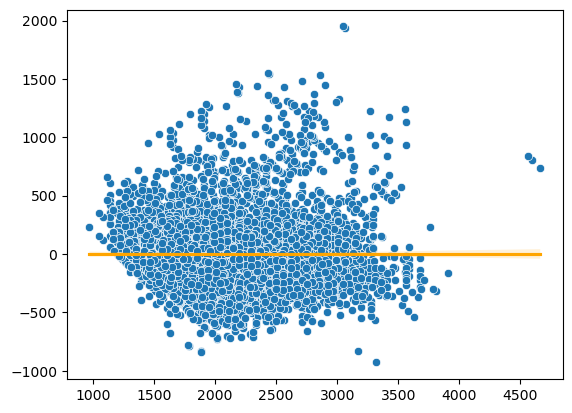

In [8]:
sns.scatterplot(x = model.predict(), y = model.resid);

sns.regplot(x=model.predict(), y=model.resid, scatter=False, color='orange')

In [9]:
import scipy.stats as stats

#### 1. Probablity Plot

In [10]:
### Residual plotter helper function

def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0], alpha=.3)
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")   

((array([-3.69316996, -3.46128945, -3.33365932, ...,  3.33365932,
          3.46128945,  3.69316996], shape=(6259,)),
  array([-929.35947012, -835.44887652, -835.01606873, ..., 1553.78485956,
         1938.70206805, 1949.90553157], shape=(6259,))),
 (np.float64(301.12469668077307),
  np.float64(3.701333926115998e-12),
  np.float64(0.966159721655718)))

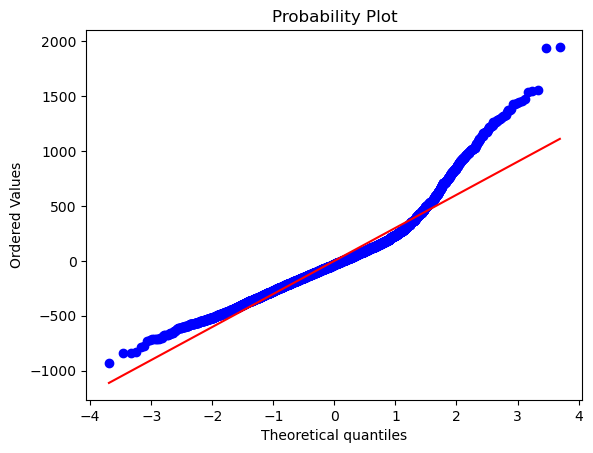

In [11]:
stats.probplot(model.resid,dist="norm", plot=plt)

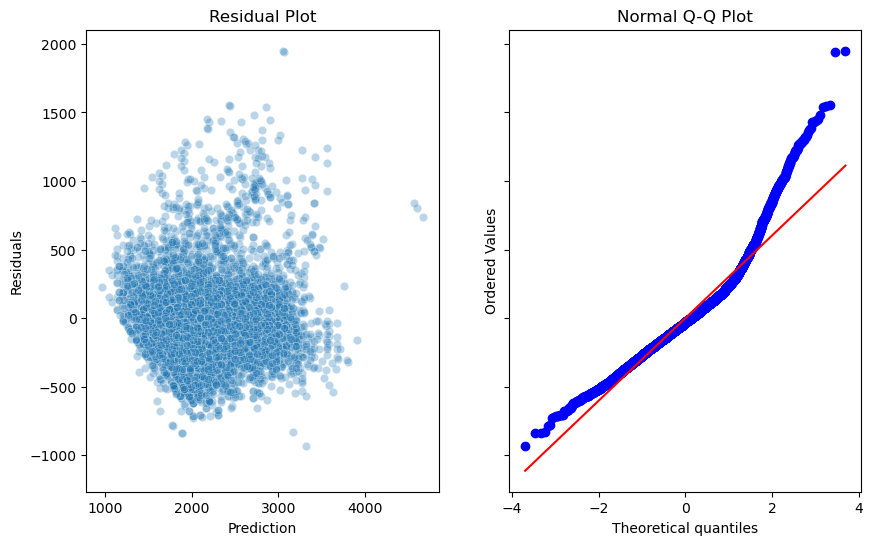

In [12]:
residual_analysis_plots(model)

#### Test model with:
- Feature Engineering
- Log Transform
- Polynomial Target

In [13]:
computers = computers.assign(
    ram2 = computers["ram"] ** 2,
    hd2 = computers["hd"] ** 2,
    premium_flag = np.where(computers["premium"] == "yes", 1, 0),
    multi_flag = np.where(computers["multi"] == "yes", 1, 0),
    cd_flag = np.where(computers["cd"] == "yes", 1, 0),
    trend2 = computers["trend"] ** 2
)

cols = [
    "ram", 
    "ram2", 
    "speed", 
    "hd", 
    "hd2", 
    "screen", 
#     "ads", 
    "trend",
    "trend2",
    "premium_flag",
    "multi_flag",
    "cd_flag"
]

X = sm.add_constant(computers[cols])
# y = computers["price"]
y = np.log(computers["price"])

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     2332.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:                 4701.5
No. Observations:                6259   AIC:                            -9379.
Df Residuals:                    6247   BIC:                            -9298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8071      0.025    272.868      0.000       6.758       6.856
ram              0.0291      0.001     21.463      0.000       0.026       0.032
ram2            -0.0004   4.95e-05     -7.439      0.000      -0.000      -0.000
speed            0.0041   7.84e-05     52.305      0.000       0.004       0.004
hd               0.0007   2.76e-05     23.632      0.000       0.001       0.001
hd2          -2.255e-07   1.89e-08    -11.950      0.000   -2.63e-07   -1.89e-07
screen           0.0511      0.002     30.692      0.000       0.048       0.054
trend           -0.0146      0.001    -18.441      0.000      -0.016      -0.013
trend2          -0.0003   2.26e-05    -13.258      0.000      -0.000      -0.000
premium_flag    -0.2352      0.005    -45.677      0.000      -0.245      -0.225
multi_flag       0.0487      0.005     10.288      0.000       0.039       0.058
cd_flag          0.0330      0.004      8.253      0.000       0.025       0.041
==============================================================================
Omnibus:                      109.578   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.458
Skew:                           0.072   Prob(JB):                     7.33e-47
Kurtosis:                       3.891   Cond. No.                     7.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

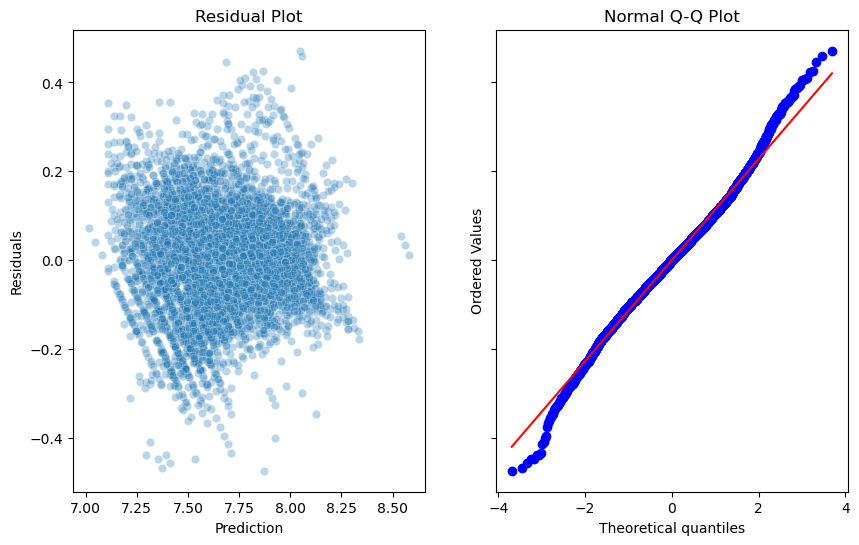

In [14]:
residual_analysis_plots(model)

#### 2. Multi-collinearity

In [15]:
# Multicollinearity looks good! VIFS all below 5, not including polynomial terms, which are exceptions

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

variables = sm.OLS(y, X).exog

pd.Series(
    [vif(variables, i) for i in range(variables.shape[1])],
    index=X.columns
)

const           298.265635
ram              27.943240
ram2             23.935180
speed             1.318827
hd               24.467411
hd2              18.083389
screen            1.088317
trend            18.652572
trend2           18.405826
premium_flag      1.121113
multi_flag        1.290003
cd_flag           1.911046
dtype: float64